In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors = ['dodgerblue','salmon','mediumseagreen']

# N=16

In [232]:
S2_PT_PIMC = [0.005691892698593975, 0.009636838705813755, 0.015062560155560118, 0.01937617352802188, 0.024369782563988373, 0.03158634577271469, 0.038252385556628736, 0.04651783847110938, 0.058074764907066735, 0.0654270781026389, 0.079552559018998, 0.08850874985588157, 0.0974312544510353, 0.10227321076633257, 0.10544149725375729, 0.10893025854868353, 0.1086396685771984, 0.11077008347653546,0.11115788431791065]
S2_PT_PIMC_err = [0.0004680672836690142, 0.00045551645649141676, 0.0005416867666976464, 0.0005199398730230718, 0.0004476998001024893, 0.0005011793700754276, 0.0004716230971194503, 0.0005115114958963607, 0.0005464481499913663, 0.0005974417570508704, 0.0006814354534641797, 0.0006821594085345586, 0.0006993876762972921, 0.0007137795730298457, 0.0007673073209149881, 0.0008626620119080441, 0.0009066005560186158, 0.0009054682948270889,0.0010094299797548786]
# betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.25,2.50,2.75,3.0,3.25,3.50,3.75,4.0,5.0]
betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.50,3.0,3.50,4.0,4.5,5.0,5.5,6.0,7.0]

S2_PT_exact = 1.125106424045E-01

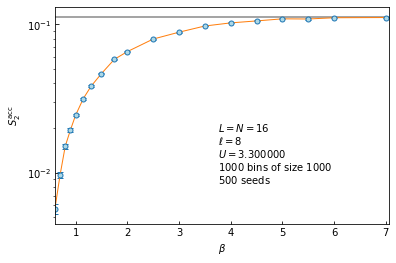

In [233]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2AccU3.3_N16_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2AccU3.3_N16_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [234]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [235]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [236]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

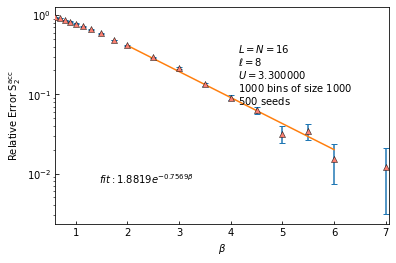

In [237]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[9:],np.log(S2_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Acc_N16_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Acc_N16_loglinear.png",dpi=400)
plt.show()

### Perform exponential fit

In [3]:
betas[9]

NameError: name 'betas' is not defined

# N=8

In [6]:
S2_PT_PIMC = [0.0044,0.0070,0.010940868425943523, 0.014255083944212493, 0.017557083707481085, 0.022250973973613922, 0.026448783193629304, 0.03157229958474552, 0.03595049782754284, 0.0392836677416325, 0.04423902195051682, 0.04571571736058756, 0.04667362742055697, 0.04789191845986924, 0.04723312172948774, 0.04800959309457498, 0.048039630946254054, 0.047268969556557634]
S2_PT_PIMC_err = [0.0002,0.0002,0.000159355531948623, 0.00016365708685469398, 0.0001960971411348087, 0.000172763593874996, 0.00018302642651308958, 0.0001888026768050491, 0.00019975709882689866, 0.0002207700013874264, 0.00025099409025136475, 0.00027254341226113087, 0.00026983386087410267, 0.00028533125839561626, 0.0003184175149432934, 0.0003430672592694829, 0.00033972373562326434, 0.000403665082476994]
betas = [0.6,0.7,0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

S2_PT_exact = 0.04786463276686823

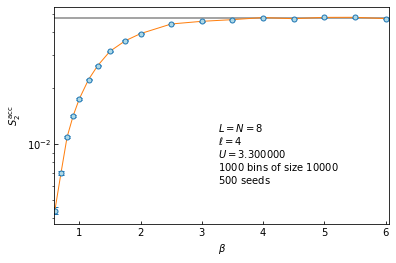

In [7]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2AccU3.3_N8_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2AccU3.3_N8_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [8]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [9]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [10]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

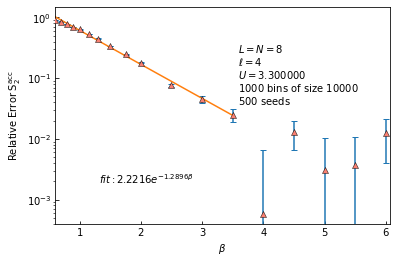

In [13]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[0:13],np.log(S2_PT_relErr)[0:13],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[12],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Acc_N8_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Acc_N8_loglinear.png",dpi=400)
plt.show()

In [16]:
betas[9]

2.0

# N=4

In [264]:
S2_PT_PIMC = [0.0019768625284431822, 0.002590002860229204, 0.004543088793010135, 0.005071960579429317, 0.0060025461118133165, 0.006769127475246962, 0.00748261184649325, 0.007909010492765649, 0.008241617606260253, 0.00888931128260915, 0.009180337302490536, 0.009456580728437473, 0.009441317270517132, 0.009966579336126475, 0.00951975952376402, 0.009321817448435465, 0.009601691598645731, 0.009637635959550235]
S2_PT_PIMC_err = [0.00015505102558742068, 0.00018502684290764223, 0.00015406442210311443, 0.0001700503670628008, 0.00017052230222249916, 0.00017888209429877669, 0.00018490805297874212, 0.0002041201510313715, 0.0002102880696926944, 0.0002174029574687115, 0.0002335263143703233, 0.00026378382532140244, 0.00027013067330943755, 0.00031605147400775945, 0.00032351671007126213, 0.0003077208456596302, 0.00033387047072466427, 0.0003628031319693405]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
S2_PT_exact = 0.009555651122495533

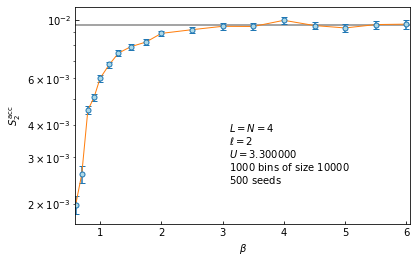

In [265]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2AccU3.3_N4_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2AccU3.3_N4_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [266]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [267]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [268]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact 

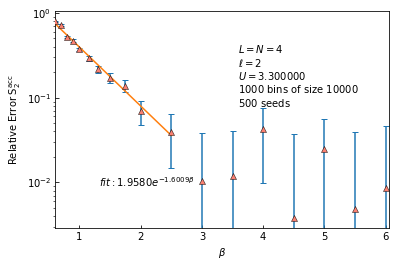

In [274]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2^{\rm{acc}}$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[0:11],np.log(S2_PT_relErr)[0:11],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[10],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

# plt.axhline(S2_PT_relErr[-1]+S2_PT_PIMC_err_err[-1],color='red')
# plt.axhline(lol,color='black')
plt.savefig("relativeErrorsS2Acc_N4_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Acc_N4_loglinear.png",dpi=400)
plt.show()